In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
heart_data_path = './datasets/heart_data.csv'
df = pd.read_csv(heart_data_path)

### Описание данных
1. age: возраст в годах
2. sex: пол
    - 1: мужской
    - 0: женский
3. cp: тип боли в груди
    - 0: типичная стенокардия
    - 1: нетипичная стенокардия
    - 2: боль, не связанная со стенокардией
    - 3: бессимптомная
4. trtbps: артериальное давление в покое в мм рт.ст.
5. chol: уровень холестерина в мг/дл
6. fbs: уровень сахара в крови натощак > 120 мг/дл
    - 1: True
    - 2: False
7. restecg: результаты электрокардиографии в состоянии покоя
    - 0: норма
    - 1: аномалия зубца ST-T (инверсия зубца T и/или подъем или спад сегмента ST > 0.05 мВ)
    - 2: указывает на вероятную или определенную гипертрофию левого желудочка по критериям Эстеса
8. thalachh: максимально достигнутая частота сердечных сокращений
9. exng: стенокардия, вызванная физической нагрузкой
    - 1: да
    - 0: нет
10. oldpeak: понижение ST, вызванное физической нагрузкой, относительно покоя
11. slp: наклон сегмента ST с максимальной нагрузкой
    - 0: повышающийся
    - 1: ровный
    - 2: нисходящий
12. caa: количество крупных сосудов (0-3), окрашенных методом флуороскопии
13. thall:
    - 0: ошибка (в исходном наборе данных соответствует NaN)
    - 1: исправленный дефект
    - 2: норма
    - 3: устраняемый дефект 
14. output:
    - 0: нет заболевания
    - 1: есть заболевание

In [20]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [21]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<Axes: >

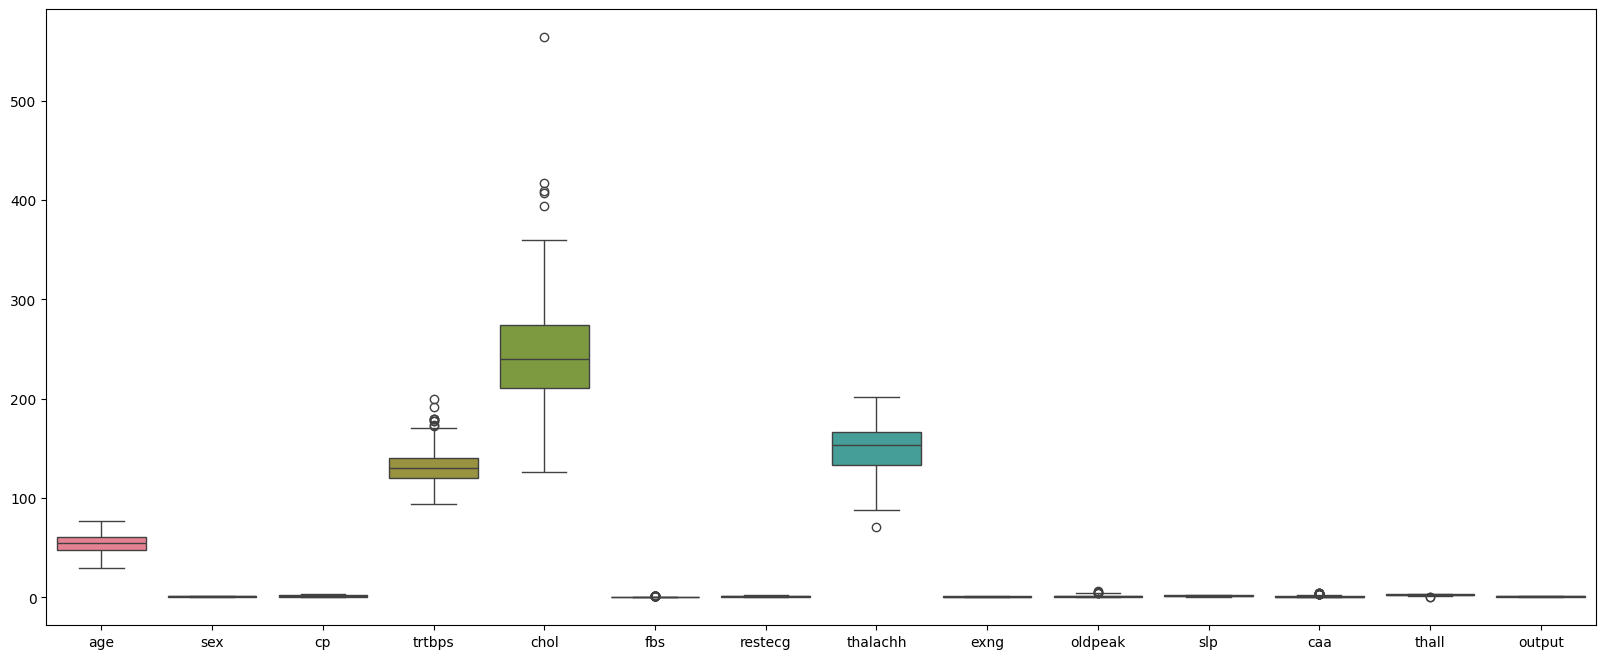

In [24]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df)

In [25]:
for column in df.columns:
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [26]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: >

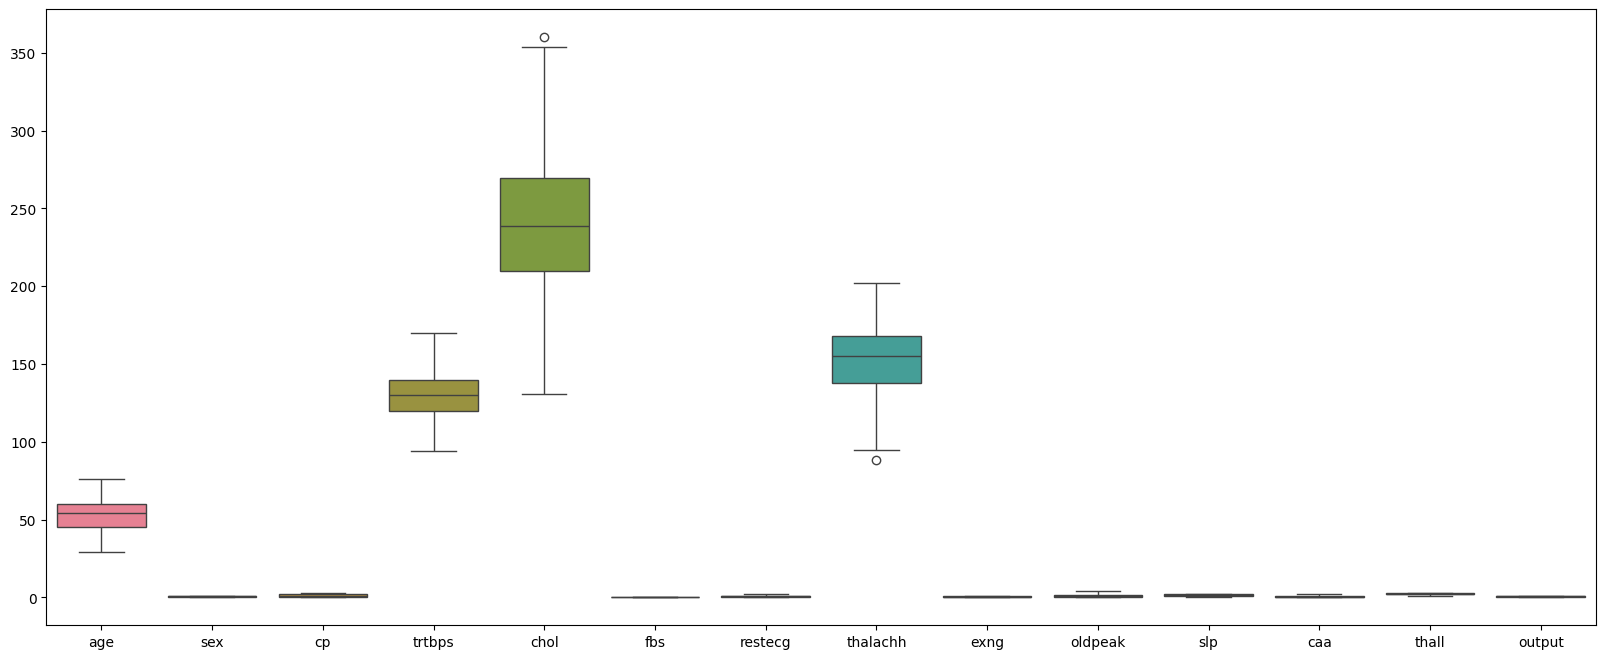

In [27]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df)

In [28]:
for column in df.columns:
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [29]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: >

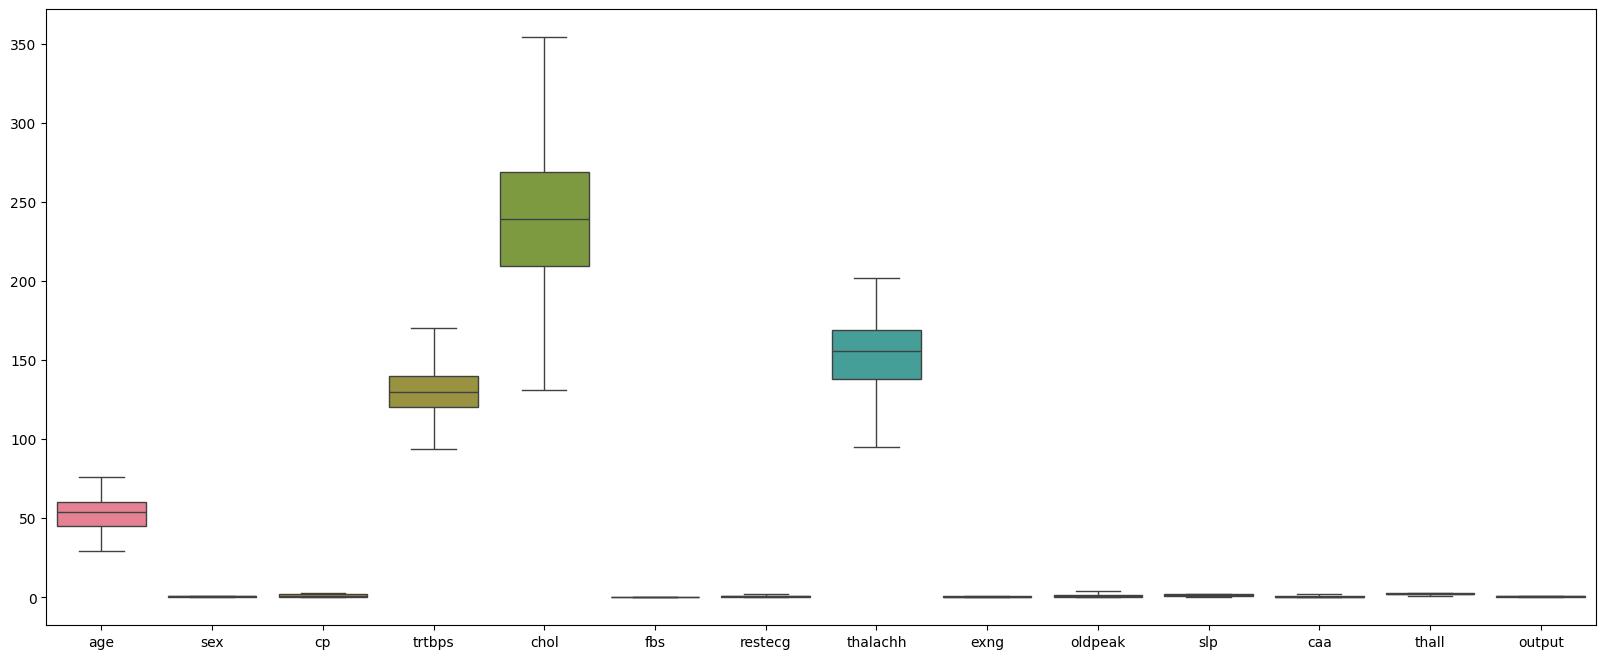

In [30]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df)

In [31]:
X = df.drop(['output'], axis = 1)
y = df['output']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [33]:
scaler = MinMaxScaler()
cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = cols)
X_test = pd.DataFrame(X_test, columns = cols)

In [34]:
X_train.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.0,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.514657,0.644444,0.333333,0.446711,0.498505,0.0,0.286111,0.525857,0.311111,0.234861,0.725000,0.247222,0.650000
std,0.200222,0.480017,0.345225,0.200078,0.199940,0.0,0.259084,0.208676,0.464239,0.261048,0.295568,0.352553,0.274116
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340426,0.000000,0.000000,0.342105,0.348655,0.0,0.000000,0.401869,0.000000,0.000000,0.500000,0.000000,0.500000
50%,0.531915,1.000000,0.333333,0.467105,0.477578,0.0,0.500000,0.556075,0.000000,0.150000,0.750000,0.000000,0.500000
75%,0.659574,1.000000,0.666667,0.585526,0.618834,0.0,0.500000,0.691589,1.000000,0.400000,1.000000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [36]:
y_pred = logreg.predict(X_test)

In [37]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.782608695652174
Precision: 0.76
Recall: 0.8260869565217391
F1 score: 0.7916666666666666
